<tr>
<td align="center">
 <div align="center">
   <font color="#21618C" size=8px>
   <b>The Sparks Foundation</b>
 <div align="center">       
   <font color="#21618C" size=5px>
   <b>Graduation Rotation Internship Program</b>
<td width="30%" align="center" > <img src="images.png"> 

<table align="left" style="margin-left: 60px;">
<td>
<font color="green" size=6px >            
<b>Data Science and Business Analytics</b>

## **Author:** Roshankumar S

## Unsupervised Learning - Prediction of optimum number of clusters
* ##### [1. Introduction to Unsupervised learning](#introduction)
* ##### [2. K-means clustering](#kmeans)
* ##### [3. Problem Statement](#problem_statement)
* ##### [4. Objective](#objective)
* ##### [5. Dataset Description](#description)
* ##### [6. Data Dictionary](#dictionary)
* ##### [7. Prerequisite](#prerequisite)
* ##### [8. Understanding and summarizing dataset](#understanding)
* ##### [9. Exploratory Data Analysis](#EDA)
* ##### [10. Data preparation](#preparation)
* ##### [11. Prediction of optimum number of clusters](#elbow)
* ##### [12. Train Model](#train_model)
* ##### [13. Visualization](#visualization)
* ##### [14. Model Evaluation](#evaluation)
* ##### [15. Conclusion](#conclusion)

<a id="introduction"><a>
## Introduction to Supervised Learning

<p style='text-align: justify; text-indent: 30px; max-width:950px;'>
    Unsupervised learning is a type of machine learning where the algorithm is trained on data that is not labeled or classified. In unsupervised learning, the algorithm tries to find patterns and structures in the data on its own. The main goal of unsupervised learning is to extract meaningful insights and knowledge from the data without any prior knowledge or guidance. The most common unsupervised learning techniques are clustering and dimensionality reduction.
</p>
<p style='text-align: justify; text-indent: 30px; max-width:950px;'>
    Clustering algorithms group similar data points together based on their features, without any knowledge of the classes or labels. The goal is to find natural groupings in the data, which can help in further analysis or decision making. Here, we are going to use K-means clustering which is a clustering technique to predict the target variable.
</p>

<a id="kmeans"><a>
## K-Means Clustering

<p style='text-align: justify; text-indent: 30px; max-width:950px;'>
K-means clustering is a popular unsupervised machine learning algorithm that is used to group similar data points together based on their features. It is an iterative algorithm that aims to partition a given dataset into a specified number of clusters.
</p>
<p style='text-align: justify; text-indent: 30px; max-width:950px;'>
The K-means algorithm works by first randomly initializing K cluster centers. Each data point is then assigned to the nearest cluster center based on the Euclidean distance between the point and the center. The means of all the data points in each cluster are then calculated to obtain the new cluster centers. The previous steps are repeated until the cluster centers no longer change or a predefined maximum number of iterations is reached.
</p>

<a id="problem_statement"><a>
## Problem Statement

<p style='text-align: justify; max-width:950px;'>
Analyze the Iris flower dataset, which contains information on the sepal length, sepal width, petal length, and petal width of three different species of Iris flowers (Setosa, Versicolor, and Virginica). Use a clustering algorithm to group similar flowers together based on their features. Determine the optimal number of clusters to use for the analysis. Visually represent the results using for easy interpretation, where each data point represents an Iris flower and is colored based on its assigned cluster. The analysis should facilitate the understanding of the different species of Iris flowers and their characteristics, enabling more targeted analysis in the future.

<a id="objective"><a>
## Objective

<p style='text-align: justify; max-width:950px;'>
The main goal of this data science and business analytics project is to analyze the Iris flower dataset and use the K-means clustering algorithm to group similar flowers together based on their features. The primary goal is to determine the optimal number of clusters for the data using the elbow method, and visually represent the results using a scatter plot for easy interpretation. This analysis will provide insights into the different species of Iris flowers and their characteristics, facilitating the understanding of the data and enabling more targeted analysis in the future.

<a id="description"><a>
## Dataset Description

<p style='text-align: justify; max-width:950px;'>
The Iris flower dataset is a widely used dataset in data science and contains information on three different species of Iris flowers: Setosa, Versicolor, and Virginica. The dataset consists of 150 instances, with 50 instances for each species.
The features included in the dataset are Sepal length , Sepal width , Petal length , Petal width.
Species is the target variable, which indicates the species of the Iris flower (Setosa, Versicolor, or Virginica). Each instance in the dataset represents a single Iris flower, and the four features provide information on the dimensions of the flower's sepal and petal.

<a id="dictionary"><a>
## Data Dictionary

**SepalLength** : Sepal length of the Iris flower in centimeters 

**SepalWidth** : Sepal width of the Iris flower in centimeters 
 
**PetalLength** : Petal length of the Iris flower in centimeters 
 
**PetalWidth** : Petal width of the Iris flower in centimeters 

**Species** : Species of the Iris flower 

<a id="prerequisite"><a>
## Prerequisite

### Import libraries

In [212]:
# Import numpy to perform mathematical operations on the dataset
import numpy as np
# Import pandas for storing , retrieving and manipulating 2-dimensional data in the form of table
import pandas as pd
# Import matplotlib for visualization tools
import matplotlib.pyplot as plt
# Import seaborn for better visualization methods
import seaborn as sns
# Import Kmeans method from sklearn to perform clustering
from sklearn.cluster import KMeans
# Import metrics for model evaluation
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score
# Import Silhouette Score for model evaluation 
from sklearn.metrics import silhouette_score
# Import warnings
import warnings
# Ignore warnings during code execution
warnings.filterwarnings("ignore")

### Import dataset 

In [205]:
# Import the iris dataset from seaborn to a dataframe
iris = sns.load_dataset("iris")

<a id="understanding"><a>
## Understanding and summarizing dataset

In [93]:
# Check the length of the dataset
len(iris)

150

In [92]:
# Display top 5 observations of the dataset
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [94]:
# Get basic information about the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [95]:
# Get statistical data of the dataset which includes 5-point summary 
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [96]:
# Check if null values are present in the dataset
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<a id="EDA"><a>
## Exploratory Data Analysis 

### Univariate Analysis

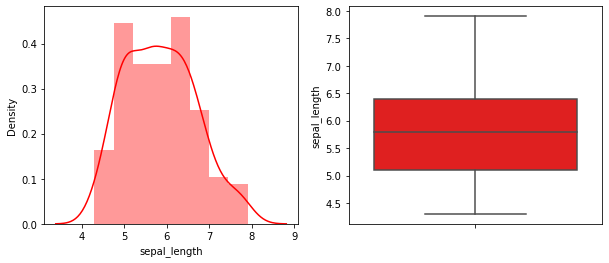

In [138]:
# Create subplots with 2 plots in 1 row
plots = plt.subplots(nrows=1,ncols=2,figsize=(10,4))[1]
# Plot a histogram and kde for sepal length
sns.distplot(iris.sepal_length,ax=plots[0],color="red")
# Plot a box plot for sepal length
sns.boxplot(y=iris.sepal_length,ax=plots[1],color="red")
# Display the plot
plt.show()

* Sepal length have normal distribution.
* It seems to have no outliers.

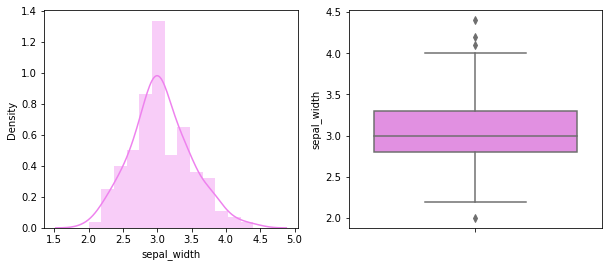

In [139]:
# Create subplots with 2 plots in 1 row
plots = plt.subplots(nrows=1,ncols=2,figsize=(10,4))[1]
# Plot a histogram and kde for sepal width
sns.distplot(iris.sepal_width,ax=plots[0],color="violet")
# Plot a box plot for sepal width
sns.boxplot(y=iris.sepal_width,ax=plots[1],color="violet")
# Display the plot
plt.show()

* Sepal width have normal distribution.
* It have few outliers on either side of the distribution.

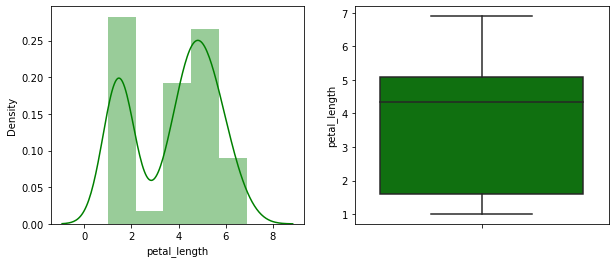

In [163]:
# Create subplots with 2 plots in 1 row
plots = plt.subplots(nrows=1,ncols=2,figsize=(10,4))[1]
# Plot a histogram and kde for petal length
sns.distplot(iris.petal_length,ax=plots[0],color="g")
# Plot a box plot for petal length
sns.boxplot(y=iris.petal_length,ax=plots[1],color="g")
# Display the plot
plt.show()

* Petal length have bimodal distribution.
* It have no outliers.

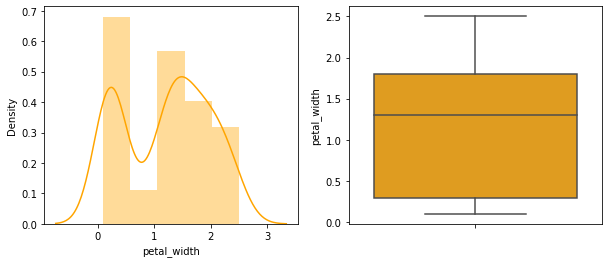

In [164]:
# Create subplots with 2 plots in 1 row
plots = plt.subplots(nrows=1,ncols=2,figsize=(10,4))[1]
# Plot a histogram and kde for petal width
sns.distplot(iris.petal_width,ax=plots[0],color="orange")
# Plot a box plot for petal width
sns.boxplot(y=iris.petal_width,ax=plots[1],color="orange")
# Display the plot
plt.show()

* Petal width have bimodal distribution.
* It doesnt have any extreme observations.

### Bivariate Analysis

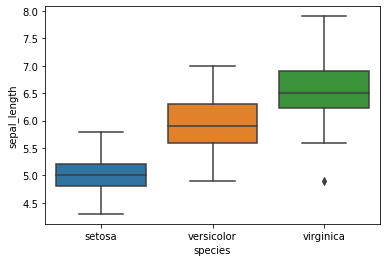

In [165]:
# Plot a multiple box plot of sepal length for each species 
sns.boxplot(y=iris.sepal_length,x=iris.species)
# Display the plot
plt.show()

* Sepal length of setosa is less compared to versicolor and virginica.
* Virginica seems to have a outlier which has length of around 5. 

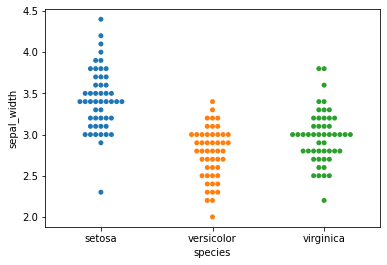

In [170]:
# Plot a multiple swarm plot of sepal width for each species 
sns.swarmplot(y=iris.sepal_width,x=iris.species)
# Display the plot
plt.show()

* It is conclusive that the mode sepal length of versicolor and virginica are same.
* Setosa has extreme observation with sepal width of around 2.3

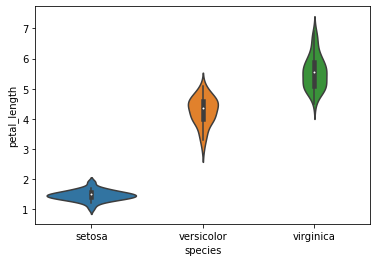

In [171]:
# Plot a multiple violin plot of petal length for each species 
sns.violinplot(y=iris.petal_length,x=iris.species)
# Display the plot
plt.show()

* Setosa have very short petal compared to versicolor and virginica.
* Versicolor and virginica seems to have skewed distributions.

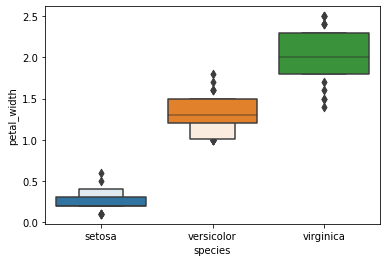

In [176]:
# Plot a multiple boxen plot of petal width for each species 
sns.boxenplot(y=iris.petal_width,x=iris.species)
# Display the plot
plt.show()

* Setosa have very small petal compared to versicolor and virginica.
* Viriginica have wide petals.

### Multivariate Analysis

In [178]:
# Display correlation data of iris dataset
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


### Heat Map of correlation

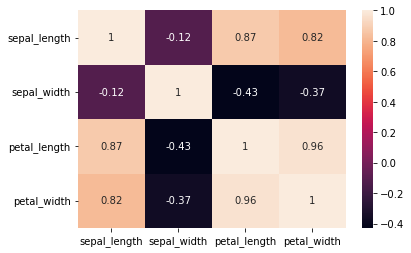

In [181]:
# Plot a heat map of iris dataset with annotations
sns.heatmap(iris.corr(),annot=True)
# Display the plot
plt.show()

* Petal length and petal width have very strong positive correlation.
* Sepal length and petal length have strong positive correlation.

### Pair wise plot

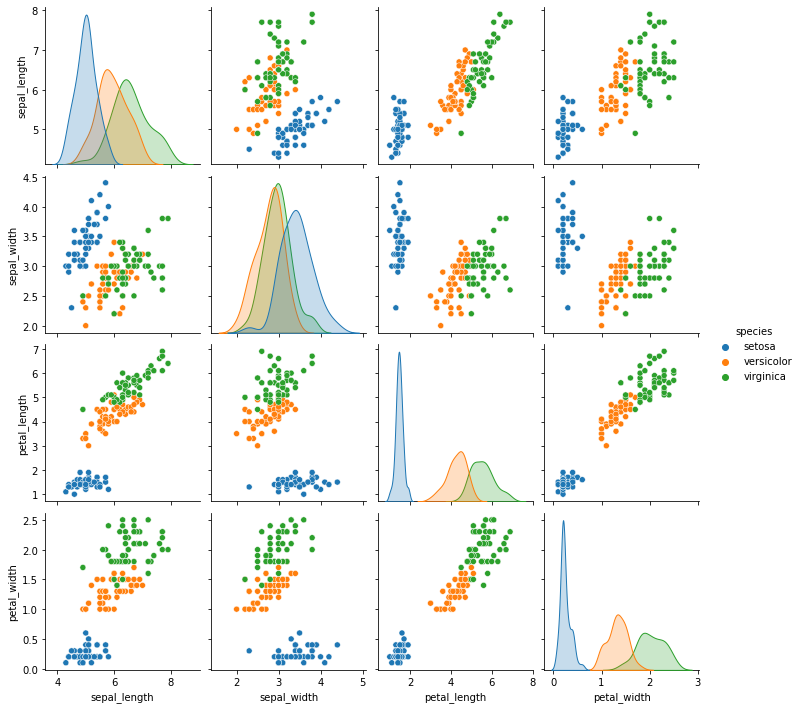

In [182]:
# Plot a pair wise scatter plot for each combination of attributes with hue as species 
sns.pairplot(data=iris,hue="species")
# Display the plot
plt.show()

* The distribution of sepal width for all 3 species are almost similar.
* Petal length and petal width have uniquely defined clusters for each species.

<a id="preparation"><a>
## Data Preparation

In [117]:
# Assign all values of independent attributes of iris dataset to a dataframe
x = iris.iloc[:, [0, 1, 2, 3]].values

<a id="elbow"><a>
## Prediction of optimum number of clusters

### Elbow method

In [28]:
# Initialize an empty list to store WCSS values for each number of clusters
wcss=[]

# Iterate over range of 2 to 10 for number of clusters using for loop
for i in range(2,11):
    # Clustering data with "i" number of clusters
    kmeans= KMeans(n_clusters=i , init = 'k-means++' , n_init = 10, random_state = 0)  
    kmeans.fit(x) # Traind the model with data which consists of independent attributes
    wcss.append(kmeans.inertia_) # Append the WCSS value ti the list

# Display the Within-Cluster Sum of Squares for each number of clusters from 2 to 10  
print(wcss)

[152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.472230158730156,
 39.03998724608725,
 34.29971212121212,
 30.063110617452722,
 28.271721728563833,
 26.094324740540415]

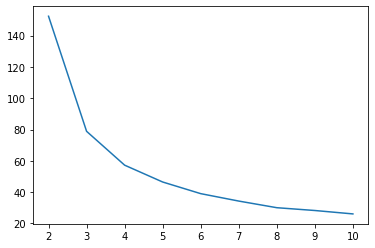

In [184]:
# Plot a line plot between number of clusters and WCSS values
plt.plot(range(2,11),wcss)
# Display the plot
plt.show()

* From the above curve, it is clear that the elbow is formed when number of clusters is around 3.
* So, we can conclude that optimum number of clusters for the iris data set is 3.

* **Optimum Number of clusters : 3**

<a id="train_model"><a>
## Train Model

In [186]:
# Cluster dataset with 3 number of clusters
kmeans= KMeans(n_clusters=3 ,init = 'k-means++', n_init = 10, random_state = 0)
y = kmeans.fit_predict(x)
# Print center values of each clusters
print(kmeans.cluster_centers_)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [187]:
# Display the cluster number of each observation
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


<a id="visualization"><a>
## Visualization 

In [189]:
# Set labels for each cluster
y_labels = ["Iris-Setosa" if i==0 else "Iris-Versicolor" if i==1 else "Iris-Virginica" for i in y]

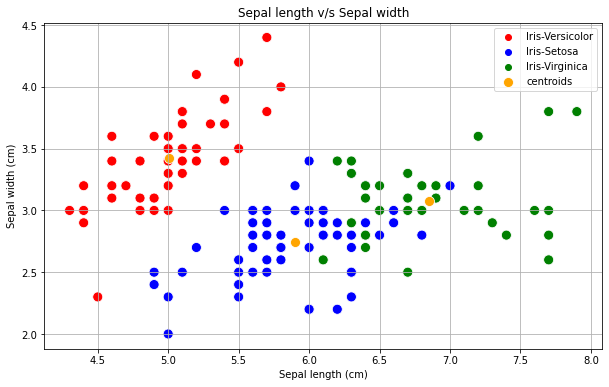

In [192]:
# Adjust plot size for better visualization
plt.figure(figsize=(10,6))
# Plot a scatter plot of first two columns with hue as cluster number
sns.scatterplot(x=x[:,0],y=x[:,1],hue=y_labels,palette=["red","blue","green"],s=100)
# Plot a scatter plot for centroids of first two columns
sns.scatterplot(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],s=100,label="centroids",color="orange")

# Set various attributes for the plot
plt.title("Sepal length v/s Sepal width") # Set title for the plot
plt.xlabel("Sepal length (cm)") # Set x-axis label for the plot
plt.ylabel("Sepal width (cm)") # Set y-axis label for the plot

# Display grid for the plot
plt.grid()
# Display the plot
plt.show()

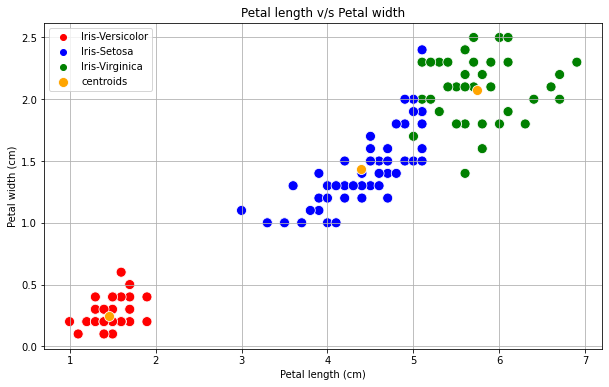

In [193]:
# Adjust plot size for better visualization
plt.figure(figsize=(10,6))
# Plot a scatter plot of last two columns with hue as cluster number
sns.scatterplot(x=x[:,2],y=x[:,3],hue=y_labels,palette=["red","blue","green"],s=100)
# Plot a scatter plot for centroids of last two columns
sns.scatterplot(x=kmeans.cluster_centers_[:,2],y=kmeans.cluster_centers_[:,3],s=100,label="centroids",color="orange")

# Set various attributes for the plot
plt.title("Petal length v/s Petal width") # Set title for the plot
plt.xlabel("Petal length (cm)") # Set x-axis label for the plot
plt.ylabel("Petal width (cm)") # Set y-axis label for the plot

# Display grid for the plot
plt.grid()
# Display the plot
plt.show()

<a id="evaluation"><a>
## Model Evaluation

In [211]:
# Print Silhouette Score of the model
print("Silhouette_score : " , silhouette_score(x, y))

Silhouette_score :  0.5528190123564102


In [210]:
ari = adjusted_rand_score(iris.species, y) # Calculate Adjusted Rand Index
ami = adjusted_mutual_info_score(iris.species, y) # Calculate Adjusted Mutual Information
homogeneity = homogeneity_score(iris.species, y) # Calculate Homogeneity Score
# Print all the metric values
print("Adjusted Rand Index : " , ari)
print("Adjusted Mutual Information : " , ami)
print("Homogeneity Score : " , homogeneity)

Adjusted Rand Index :  0.7302382722834697
Adjusted Mutual Information :  0.7551191675800484
Homogeneity Score :  0.7514854021988339


* Observing the metrics, the model is a good performance model.

<a id="conclusion"><a>
## Conclusion

<p style='text-align: justify; max-width:950px; text-indent: 30px;'>
In this project, I was asked to predict the optimum number of clusters for the Iris dataset using k-means clustering and to visualize the results. I performed exploratory data analysis to gain insights into the distribution of the data and the relationship between different features.
<p style='text-align: justify; max-width:950px; text-indent: 30px;'>
I used the elbow method to determine the optimal number of clusters, and found that k=3 was the best choice. I then trained a k-means clustering model with k=3 and evaluated its performance using various metrics. Based on the metric values, the model was turned out be a good performance model.
<p style='text-align: justify; max-width:950px; text-indent: 30px;'>
The results of the clustering showed that the three species of iris (setosa, versicolor, and virginica) were well-separated based on their sepal length, sepal width, petal length, and petal width. The visualizations of the clusters using scatter plots and pair plots provided clear and informative insights into the relationships between different features and the distribution of the data.
<p style='text-align: justify; max-width:950px; text-indent: 30px;'>
In conclusion, the k-means clustering algorithm was able to successfully identify the optimal number of clusters for the Iris dataset and provide valuable insights into the underlying patterns and relationships in the data.